In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Análise dos terceirizados ativos

## Criar um dataframe apenas com os terceirizados ativos

In [2]:
df_terceirizados = pd.read_csv("../extracao_dados/terceirizados_consolidados.csv", dtype=str)

In [3]:
df_terceirizados.head()

,Órgão,Unidade Gestora,Fornecedor,Número Contrato,CPF,Nome,Função,Descrição Complementar,Jornada Semanal,Unidade,Custo do posto,Auxílio Trasporte,Vale Alimentação,Escolaridade,Data Início,Data Fim,Situação
0,26266 - FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,154359 - UNIPAMPA,10.439.655/0001-14 - PHENIX SOLUCOES LTDA,00003/2017,***.043.350-**,DANIEL SOARES DE ALMEIDA,Almoxarife,NaN,30,BAGÉ,"R$ 2.239,48","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,05/12/2018,NaN,Ativo
1,63000 - ADVOCACIA-GERAL DA UNIAO,110097 - SAD4R/AGU,13.697.422/0001-00 - GED PRESTADORA DE SERVICO...,00012/2020,***.566.379-**,ALESSANDRA LOPES FERREIRA,Agente administrativo,NaN,40,EA FOZ DO IGUAÇU/ AGU/PR,"R$ 3.535,06","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,28/07/2021,NaN,Ativo
2,30203 - INSTIT.NAC. DE METROLOG. QUALID. E TEC...,183039 - SURRS,04.321.961/0002-30 - BRAVHA SERVICOS LTDA,00018/2021,***.518.920-**,DARLEN PATRÍCIA VIANA DOS SANTOS,Auxiliar de Limpeza,SERVENTE DE LIMPEZA,40,SURRS/NUADM,"R$ 4.086,76","R$ 4,80","R$ 22,00",03 – Ensino Fundamental Incompleto,25/09/2023,27/09/2023,Inativo
3,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.763.787-**,EVERTON DOS SANTOS SILVA,Oficial de manutenção predial,AUXILIAR - MANUTENÇÃO CIVIL - ELÉTRICA / MEIO-...,44,COGIC,"R$ 6.220,25","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo
4,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.863.497-**,IREMAR ROQUE DA CRUZ,Oficial de manutenção predial,OFICIAL - MANUTENÇÃO CIVIL - PEDREIRO,44,COGIC,"R$ 6.671,02","R$ 0,00","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo


In [4]:
df_terceirizados.columns

Index(['Órgão', 'Unidade Gestora', 'Fornecedor', 'Número Contrato', 'CPF',
       'Nome', 'Função', 'Descrição Complementar', 'Jornada Semanal',
       'Unidade', 'Custo do posto', 'Auxílio Trasporte', 'Vale Alimentação',
       'Escolaridade', 'Data Início', 'Data Fim', 'Situação'],
      dtype='object')

In [5]:
df_ativos = df_terceirizados[df_terceirizados['Situação'].str.strip().str.upper() == 'ATIVO'].copy()

In [6]:
df_ativos.shape

(39466, 17)

In [7]:
df_ativos.head()

,Órgão,Unidade Gestora,Fornecedor,Número Contrato,CPF,Nome,Função,Descrição Complementar,Jornada Semanal,Unidade,Custo do posto,Auxílio Trasporte,Vale Alimentação,Escolaridade,Data Início,Data Fim,Situação
0,26266 - FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,154359 - UNIPAMPA,10.439.655/0001-14 - PHENIX SOLUCOES LTDA,00003/2017,***.043.350-**,DANIEL SOARES DE ALMEIDA,Almoxarife,NaN,30,BAGÉ,"R$ 2.239,48","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,05/12/2018,NaN,Ativo
1,63000 - ADVOCACIA-GERAL DA UNIAO,110097 - SAD4R/AGU,13.697.422/0001-00 - GED PRESTADORA DE SERVICO...,00012/2020,***.566.379-**,ALESSANDRA LOPES FERREIRA,Agente administrativo,NaN,40,EA FOZ DO IGUAÇU/ AGU/PR,"R$ 3.535,06","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,28/07/2021,NaN,Ativo
3,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.763.787-**,EVERTON DOS SANTOS SILVA,Oficial de manutenção predial,AUXILIAR - MANUTENÇÃO CIVIL - ELÉTRICA / MEIO-...,44,COGIC,"R$ 6.220,25","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo
4,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.863.497-**,IREMAR ROQUE DA CRUZ,Oficial de manutenção predial,OFICIAL - MANUTENÇÃO CIVIL - PEDREIRO,44,COGIC,"R$ 6.671,02","R$ 0,00","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo
5,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.294.847-**,OCTAVIO PASCOAL ALVES PINTO,Oficial de manutenção predial,OFICIAL - MANUTENÇÃO CIVIL - ELÉTRICA - PLANTÃ...,44,COGIC,"R$ 7.732,94","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo


## Distribuição das funções

In [8]:
df_ativos['Função'].value_counts() 

VIGILANTE                         5553
Auxiliar de Limpeza               4713
Limpeza e Conservação             4162
Assistente Administrativo         3029
Auxiliar Administrativo           2856
                                  ... 
Tapeceiro                            1
Adestrador de animais                1
Lavadeiro em geral                   1
Locutor de mídias audiovisuais       1
Técnico Agropecuário                 1
Name: Função, Length: 170, dtype: int64

In [9]:
# Agrupa por função e conta os registros
top_funcoes = (
    df_ativos['Função']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'Função', 'Função': 'Quantidade'})
)

In [10]:
top_funcoes

,Função,Quantidade
0,VIGILANTE,5553
1,Auxiliar de Limpeza,4713
2,Limpeza e Conservação,4162
3,Assistente Administrativo,3029
4,Auxiliar Administrativo,2856
5,"Recepcionista, em geral",2532
6,Auxiliar de Serviços Diversos,1445
7,Motorista,1441
8,Porteiro,1052
9,VIGIA,979


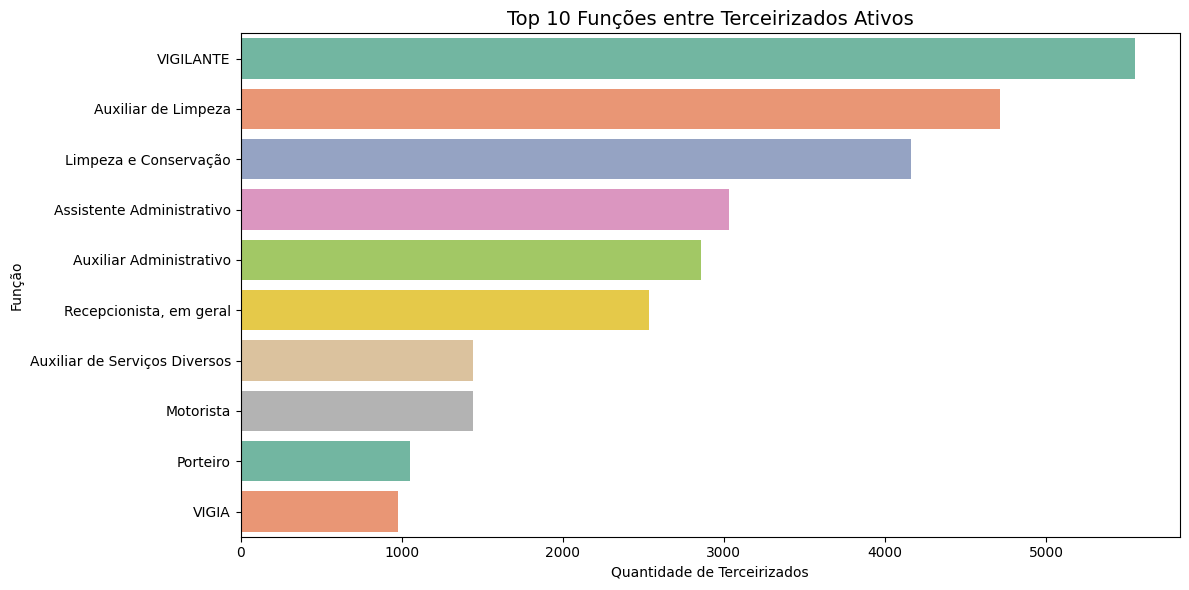

In [11]:
# Cria o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_funcoes, y='Função', x='Quantidade', hue='Função', palette='Set2', legend=False)
plt.title("Top 10 Funções entre Terceirizados Ativos", fontsize=14)
plt.xlabel("Quantidade de Terceirizados")
plt.ylabel("Função")

plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/top_10_funcoes.png", dpi=300)  # Salva em alta resolução

plt.show()

## Analisar o salário e as funções

Não há informação sobre salário nessa base do Contratos Gov, então vamos cruzar com o histórico da CGU.

In [12]:
# Caminho da pasta com os arquivos
pasta_terceirizados = Path("../../previsao_contratacao/data/terceirizados")

In [13]:
# Anos que você quer tratar
anos = [2019, 2020, 2021, 2022, 2023]

# Criar um dicionário para armazenar os dataframes por ano
dfs_por_ano = {}

In [14]:
# Iterar pelos arquivos
for arquivo in pasta_terceirizados.glob("terceirizados_*.csv"):
    nome_arquivo = arquivo.name
    try:
        ano = int(nome_arquivo.split("_")[1][:4])
    except Exception as e:
        print(f"❌ Erro ao extrair ano de {nome_arquivo}: {e}")
        continue

    if ano in anos:
        print(f"📄 Lendo: {nome_arquivo}")
        try:
            df = pd.read_csv(arquivo, sep=";", encoding="latin1", low_memory=False, dtype=str)
        except UnicodeDecodeError as e:
            print(f"⚠️ Erro de encoding em {nome_arquivo}: {e}")
            continue

        if ano not in dfs_por_ano:
            dfs_por_ano[ano] = []
        dfs_por_ano[ano].append(df)

📄 Lendo: terceirizados_202101.csv
📄 Lendo: terceirizados_202301.csv
📄 Lendo: terceirizados_202305.csv
📄 Lendo: terceirizados_202105.csv
📄 Lendo: terceirizados_202201.csv
📄 Lendo: terceirizados_202001.csv
📄 Lendo: terceirizados_201905.csv
📄 Lendo: terceirizados_201901.csv
📄 Lendo: terceirizados_202005.csv
📄 Lendo: terceirizados_202205.csv
📄 Lendo: terceirizados_202209.csv
📄 Lendo: terceirizados_202009.csv
📄 Lendo: terceirizados_201909.csv
📄 Lendo: terceirizados_202109.csv
📄 Lendo: terceirizados_202309.csv


In [15]:
# Concatenar os dataframes por ano
for ano, lista_dfs in dfs_por_ano.items():
    globals()[f"df_{ano}"] = pd.concat(lista_dfs, ignore_index=True)
    print(f"✅ df_{ano} criado com {len(globals()[f'df_{ano}'])} linhas.")

✅ df_2021 criado com 220032 linhas.
✅ df_2023 criado com 233936 linhas.
✅ df_2022 criado com 229810 linhas.
✅ df_2020 criado com 228724 linhas.
✅ df_2019 criado com 276554 linhas.


In [16]:
# Caminho da pasta com os arquivos de 2024
pasta_dados = Path("../data")

In [17]:
# Seleciona todos os arquivos que seguem o padrão terceirizados2024*.xlsx
arquivos_2024 = sorted(pasta_dados.glob("terceirizados2024*.xlsx"))

In [18]:
# Lê cada arquivo como string
dfs_2024 = []
for arquivo in arquivos_2024:
    df = pd.read_excel(arquivo, dtype=str)
    dfs_2024.append(df)

In [19]:
# Concatena todos os dataframes
df_2024 = pd.concat(dfs_2024, ignore_index=True)

In [20]:
# Remover duplicatas
df_2024 = df_2024.drop_duplicates()

In [21]:
df_historico = pd.read_csv("../../previsao_contratacao/data/historico_cgu/terceirizados-2010-2023.csv", sep=";", dtype=str, low_memory=False)

In [22]:
df_historico_atualizado = pd.concat([df_historico, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)

In [23]:
df_historico_atualizado = df_historico_atualizado.drop_duplicates()

In [24]:
df_historico_atualizado.columns

Index(['id_terc', 'sg_orgao_sup_tabela_ug', 'cd_ug_gestora', 'nm_ug_tabela_ug',
       'sg_ug_gestora', 'nr_contrato', 'nr_cnpj', 'nm_razao_social', 'nr_cpf',
       'nm_terceirizado', 'nm_categoria_profissional', 'nm_escolaridade',
       'nr_jornada', 'nm_unidade_prestacao', 'vl_mensal_salario',
       'vl_mensal_custo', 'Num_Mes_Carga', 'Mes_Carga', 'Ano_Carga',
       'sg_orgao', 'nm_orgao', 'cd_orgao_siafi', 'cd_orgao_siape',
       'ï»¿id_terc'],
      dtype='object')

In [25]:
df_historico_atualizado.head()

,id_terc,sg_orgao_sup_tabela_ug,cd_ug_gestora,nm_ug_tabela_ug,sg_ug_gestora,nr_contrato,nr_cnpj,nm_razao_social,nr_cpf,nm_terceirizado,...,vl_mensal_salario,vl_mensal_custo,Num_Mes_Carga,Mes_Carga,Ano_Carga,sg_orgao,nm_orgao,cd_orgao_siafi,cd_orgao_siape,ï»¿id_terc
0,1,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.140.291-**,CAMILA FERNANDA ROCHA DE SOUSA,...,502.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN
1,2,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.338.161-**,DEILTON ALVES SANTANA,...,502.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN
2,3,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.532.161-**,GLEIDES MARIA DE SOUSA,...,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN
3,4,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.694.231-**,DINIS ALVES DE OLIVEIRA,...,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN
4,5,MDA,490011,MINISTERIO DO DESENVOLVIMENTO AGRARIO – ADMINI...,MDA-ADM. DIRETA,68/2008,02633573000188,AJ SERVICOS LTDA,***.049.961-**,ELIETE DUARTE,...,940.0,0.0,1,JANEIRO,2010,MDA,MINISTERIO DO DESENVOLVIMENTO AGRARIO,49000,42000,NaN


In [26]:
df_ativos.columns

Index(['Órgão', 'Unidade Gestora', 'Fornecedor', 'Número Contrato', 'CPF',
       'Nome', 'Função', 'Descrição Complementar', 'Jornada Semanal',
       'Unidade', 'Custo do posto', 'Auxílio Trasporte', 'Vale Alimentação',
       'Escolaridade', 'Data Início', 'Data Fim', 'Situação'],
      dtype='object')

In [27]:
# Pegar o salário mais recente por CPF no histórico
df_salario_por_cpf = (
    df_historico_atualizado
    .dropna(subset=['nr_cpf', 'vl_mensal_salario'])
    .sort_values(['nr_cpf', 'Ano_Carga'], ascending=[True, False])
    .drop_duplicates(subset=['nr_cpf'])  # mantém apenas o mais recente por CPF
    [['nr_cpf', 'vl_mensal_salario']]    # só mantém essas colunas
)

In [28]:
# Faz o merge com df_ativos usando apenas CPF
df_ativos_com_salario = df_ativos.merge(
    df_salario_por_cpf,
    left_on='CPF',
    right_on='nr_cpf',
    how='left'
).drop(columns=['nr_cpf'])  # remove duplicata de coluna de CPF

# Resultado final com salário preenchido quando houver
df_ativos_com_salario.head()

,Órgão,Unidade Gestora,Fornecedor,Número Contrato,CPF,Nome,Função,Descrição Complementar,Jornada Semanal,Unidade,Custo do posto,Auxílio Trasporte,Vale Alimentação,Escolaridade,Data Início,Data Fim,Situação,vl_mensal_salario
0,26266 - FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,154359 - UNIPAMPA,10.439.655/0001-14 - PHENIX SOLUCOES LTDA,00003/2017,***.043.350-**,DANIEL SOARES DE ALMEIDA,Almoxarife,NaN,30,BAGÉ,"R$ 2.239,48","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,05/12/2018,NaN,Ativo,924.0
1,63000 - ADVOCACIA-GERAL DA UNIAO,110097 - SAD4R/AGU,13.697.422/0001-00 - GED PRESTADORA DE SERVICO...,00012/2020,***.566.379-**,ALESSANDRA LOPES FERREIRA,Agente administrativo,NaN,40,EA FOZ DO IGUAÇU/ AGU/PR,"R$ 3.535,06","R$ 0,00","R$ 0,00",06 – Ensino Médio Completo,28/07/2021,NaN,Ativo,NaN
2,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.763.787-**,EVERTON DOS SANTOS SILVA,Oficial de manutenção predial,AUXILIAR - MANUTENÇÃO CIVIL - ELÉTRICA / MEIO-...,44,COGIC,"R$ 6.220,25","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo,10101
3,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.863.497-**,IREMAR ROQUE DA CRUZ,Oficial de manutenção predial,OFICIAL - MANUTENÇÃO CIVIL - PEDREIRO,44,COGIC,"R$ 6.671,02","R$ 0,00","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo,1764
4,36201 - FUNDACAO OSWALDO CRUZ,254462 - COGIC/FIOCRUZ,16.099.194/0001-64 - ELETRODATA ENGENHARIA LTDA,00051/2019,***.294.847-**,OCTAVIO PASCOAL ALVES PINTO,Oficial de manutenção predial,OFICIAL - MANUTENÇÃO CIVIL - ELÉTRICA - PLANTÃ...,44,COGIC,"R$ 7.732,94","R$ 16,20","R$ 28,84",06 – Ensino Médio Completo,23/12/2019,NaN,Ativo,2899


### Top 10 funções com o maior quantitativo

In [29]:
# Define o top 10 funções (supondo que você já tenha a lista)
funcoes_top10 = [
    "VIGILANTE", "Auxiliar de Limpeza", "Limpeza e Conservação",
    "Assistente Administrativo", "Auxiliar Administrativo",
    "Recepcionista, em geral", "Auxiliar de Serviços Diversos",
    "Motorista", "Porteiro", "VIGIA"
]

In [30]:
# Filtra apenas essas funções
df_top_funcoes_salario = df_ativos_com_salario[
    df_ativos_com_salario['Função'].isin(funcoes_top10)
]

In [31]:
df_top_funcoes_salario['vl_mensal_salario'] = (
    df_top_funcoes_salario['vl_mensal_salario']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[^\d\.]', '', regex=True)  # remove caracteres não numéricos
    .replace('', np.nan)                      # substitui strings vazias por NaN
    .astype(float)
)

/var/folders/44/wjzjf_412m1cl66j1pj3b0_00000gn/T/ipykernel_1839/1283081169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_funcoes_salario['vl_mensal_salario'] = (


In [32]:
# Agrupa por função e calcula a mediana do salário
df_mediana_salario = (
    df_top_funcoes_salario
    .groupby('Função')['vl_mensal_salario']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

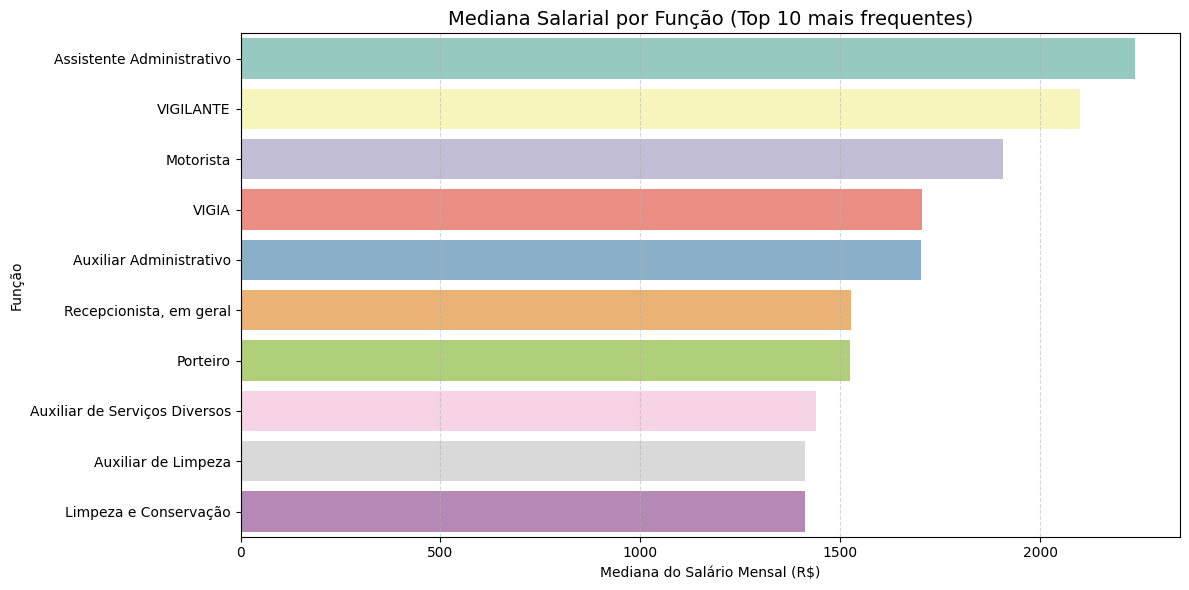

In [33]:
# Criação do gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_mediana_salario,
    x='vl_mensal_salario',
    y='Função',
    hue='Função',
    palette='Set3',
    legend=False
)

plt.title('Mediana Salarial por Função (Top 10 mais frequentes)', fontsize=14)
plt.xlabel('Mediana do Salário Mensal (R$)')
plt.ylabel('Função')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/mediana_salarial_ativos.png", dpi=300)  # Salva em alta resolução

plt.show()

### Carga horária x Salário mensal

#### Top 10 categorias com o maior quantitativo de ativos

Para cálculo do valor da hora da categoria, vamos multiplicar por 4.33 porque é uma média de semana por mês considerando 12 meses. O cálculo ficará assim:

valor_hora = vl_mensal_salario / (Jornada Semanal x 4.33)

In [35]:
df_top_funcoes_salario['Jornada Semanal'] = pd.to_numeric(
    df_top_funcoes_salario['Jornada Semanal'], errors='coerce'
)

/var/folders/44/wjzjf_412m1cl66j1pj3b0_00000gn/T/ipykernel_1839/3578268577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_funcoes_salario['Jornada Semanal'] = pd.to_numeric(


In [37]:
# Calcula as medianas por função
df_mediana_salario = (
    df_top_funcoes_salario
    .groupby('Função', as_index=False)['vl_mensal_salario']
    .median()
    .rename(columns={'vl_mensal_salario': 'mediana_salario'})
)

df_mediana_jornada = (
    df_top_funcoes_salario
    .groupby('Função', as_index=False)['Jornada Semanal']
    .median()
    .rename(columns={'Jornada Semanal': 'mediana_jornada'})
)

In [38]:
# Junta e calcula o valor/hora
df_valor_hora_top10 = df_mediana_salario.merge(df_mediana_jornada, on='Função')
df_valor_hora_top10['valor_hora'] = (
    df_valor_hora_top10['mediana_salario'] / (df_valor_hora_top10['mediana_jornada'] * 4.33)
)

# Ordena para visualização
df_valor_hora_top10 = df_valor_hora_top10.sort_values('valor_hora', ascending=False)

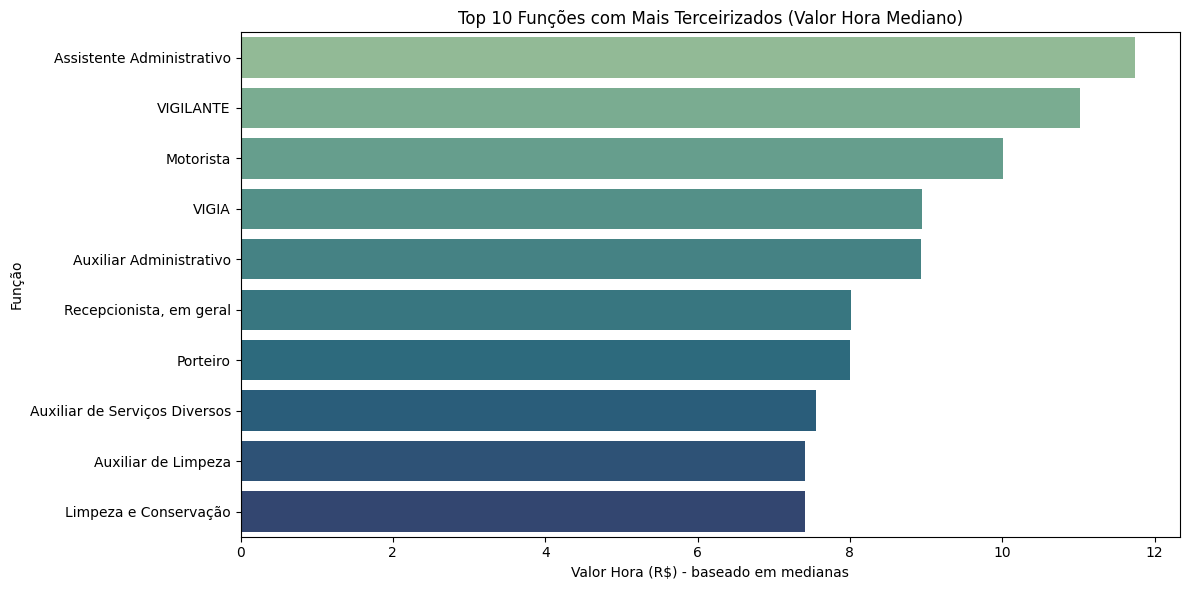

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_valor_hora_top10,
    x='valor_hora',
    y='Função',
    palette='crest',
    hue='Função',
    legend=False
)
plt.xlabel("Valor Hora (R$) - baseado em medianas")
plt.ylabel("Função")
plt.title("Top 10 Funções com Mais Terceirizados (Valor Hora Mediano)")
plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/mediana_valor_hora_top_10.png", dpi=300)  # Salva em alta resolução

plt.show()

#### Dos maiores salários mensais

In [41]:
# Converte 'vl_mensal_salario' para float, caso ainda não esteja
df_ativos_com_salario['vl_mensal_salario'] = (
    df_ativos_com_salario['vl_mensal_salario']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[^\d\.]', '', regex=True)
    .replace('', np.nan)  # trata campos vazios
    .astype(float)
)

In [43]:
# Converte Jornada Semanal para float
df_ativos_com_salario['Jornada Semanal'] = (
    df_ativos_com_salario['Jornada Semanal']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(r'[^\d\.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)

In [50]:
# Calcula mediana salarial por função
df_mediana_salario = (
    df_ativos_com_salario
    .groupby('Função', as_index=False)['vl_mensal_salario']
    .median()
    .rename(columns={'vl_mensal_salario': 'mediana_salario'})
)

# Calcula mediana da jornada semanal por função
df_mediana_jornada = (
    df_ativos_com_salario
    .groupby('Função', as_index=False)['Jornada Semanal']
    .median()
    .rename(columns={'Jornada Semanal': 'mediana_jornada'})
)

# Junta os dois
df_funcoes_valor_hora = df_mediana_salario.merge(df_mediana_jornada, on='Função')

In [51]:
# Calcula valor/hora com base nas medianas
df_funcoes_valor_hora['valor_hora'] = (
    df_funcoes_valor_hora['mediana_salario'] / (df_funcoes_valor_hora['mediana_jornada'] * 4.33)
)

# Seleciona as top 10 por valor/hora
df_top_valor_hora = df_funcoes_valor_hora.sort_values('valor_hora', ascending=False).head(10)

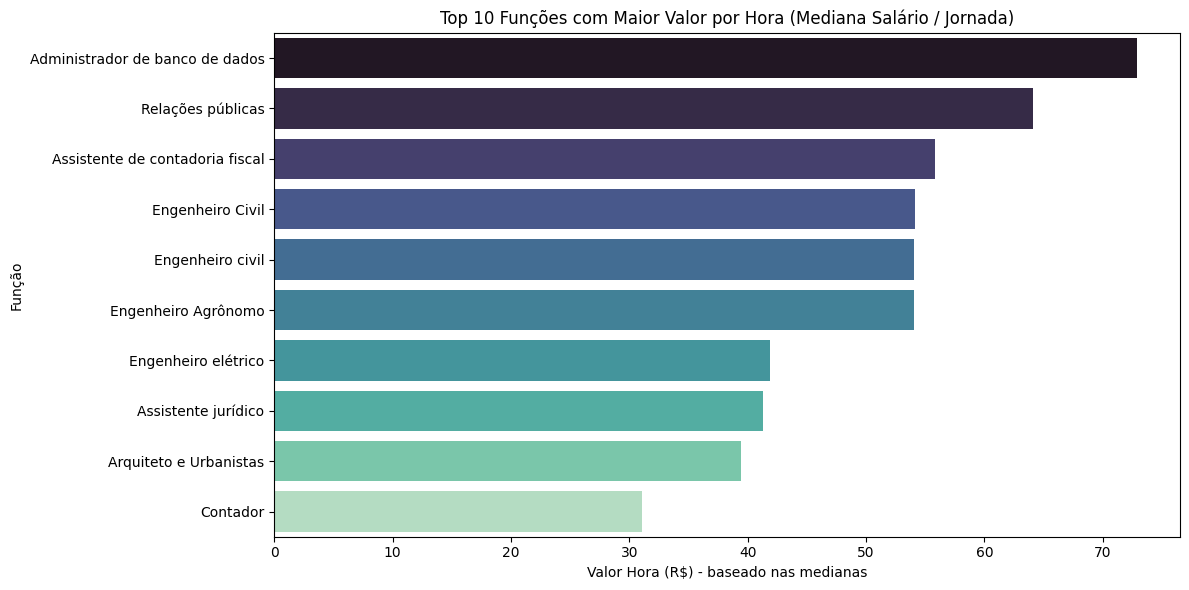

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_valor_hora, x='valor_hora', y='Função', hue='Função', palette='mako', legend=False)
plt.xlabel("Valor Hora (R$) - baseado nas medianas")
plt.ylabel("Função")
plt.title("Top 10 Funções com Maior Valor por Hora (Mediana Salário / Jornada)")
plt.tight_layout()

# Caminho e nome do arquivo
#plt.savefig("./graficos/mediana_valor_hora_top_10.png", dpi=300)  # Salva em alta resolução

plt.show()